In [52]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time
from orbithunter.gluing import tile_dictionary_ks

In [53]:
from orbithunter.convolutional_neural_networks import orbit_cnn

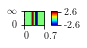

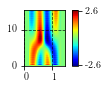

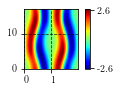

In [54]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padded=True)

td[0].plot()

td[1].plot()

td[2].plot()

In [55]:
tile_dictionary = rediscretize_tiling_dictionary(tile_dictionary_ks(), new_shape=(16,16))
glue_shape = (3, 3)
symbol_arrays = generate_symbol_arrays(tile_dictionary, glue_shape=glue_shape, unique=True)

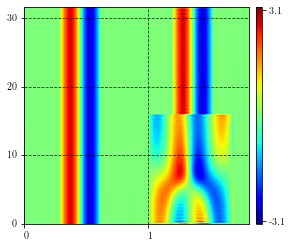

In [39]:
tile(symbol_arrays[0], td, OrbitKS).plot(figsize=(4,4))

In [11]:
tile(symbol_arrays[0], td, OrbitKS).shape

(128, 128)

In [12]:
from collections import Counter

In [13]:
symbol_arrays = generate_symbol_arrays(td, glue_shape, unique=True)
X = []
symbol_y = []
converge_y = []

for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS),new_shape=(32, 32))
    X.append(tiling.state)
    symbol_counter = Counter(sa.ravel().tolist())
    symbol_y.append([symbol_counter[0], symbol_counter[1], symbol_counter[2]])
X = np.array(X)
X = np.reshape(X, (*X.shape, 1))
y = np.array(symbol_y)

In [15]:
X.shape

(15, 32, 32, 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Activation
from sklearn.model_selection import train_test_split

X = (X - X.mean()) / X.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample_size = X.shape[0]

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=8, padding='valid', input_shape=X.shape[1:]
               ))
cnn.add(AveragePooling2D(pool_size=2))
cnn.add(Activation('relu'))

cnn.add(Conv2D(filters=8, kernel_size=8,
               padding='valid'
               ))
cnn.add(AveragePooling2D(pool_size=2))
cnn.add(Activation('relu'))
cnn.add(Flatten())
cnn.add(Dense(int(sample_size)))
cnn.add(Dense(y.shape[1], activation='relu'))
cnn.compile(loss='mse', optimizer='adam')

In [20]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 8)           16392     
_________________________________________________________________
average_pooling2d_3 (Average (None, 2, 2, 8)           0         
_________________________________________________________________
activation_3 (Activation)    (None, 2, 2, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)               

In [22]:
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100)

Train on 12 samples, validate on 3 samples
Epoch 1/100
12/12 [==============================] - 0s 2ms/sample - loss: 1.9589 - val_loss: 1.2939
Epoch 2/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.5769 - val_loss: 1.0142
Epoch 3/100
12/12 [==============================] - 0s 992us/sample - loss: 1.4929 - val_loss: 0.9548
Epoch 4/100
12/12 [==============================] - 0s 999us/sample - loss: 1.5873 - val_loss: 0.9299
Epoch 5/100
12/12 [==============================] - 0s 999us/sample - loss: 1.5700 - val_loss: 0.9094
Epoch 6/100
12/12 [==============================] - 0s 999us/sample - loss: 1.4567 - val_loss: 0.9099
Epoch 7/100
12/12 [==============================] - 0s 999us/sample - loss: 1.3526 - val_loss: 0.9308
Epoch 8/100
12/12 [==============================] - 0s 999us/sample - loss: 1.2601 - val_loss: 0.9692
Epoch 9/100
12/12 [==============================] - 0s 999us/sample - loss: 1.1920 - val_loss: 0.9863
Epoch 10/100
12/12 [==============

Epoch 80/100
12/12 [==============================] - 0s 999us/sample - loss: 0.0160 - val_loss: 0.0588
Epoch 81/100
12/12 [==============================] - 0s 999us/sample - loss: 0.0147 - val_loss: 0.0590
Epoch 82/100
12/12 [==============================] - 0s 999us/sample - loss: 0.0135 - val_loss: 0.0594
Epoch 83/100
12/12 [==============================] - 0s 916us/sample - loss: 0.0125 - val_loss: 0.0599
Epoch 84/100
12/12 [==============================] - 0s 916us/sample - loss: 0.0120 - val_loss: 0.0609
Epoch 85/100
12/12 [==============================] - 0s 916us/sample - loss: 0.0117 - val_loss: 0.0623
Epoch 86/100
12/12 [==============================] - 0s 916us/sample - loss: 0.0115 - val_loss: 0.0640
Epoch 87/100
12/12 [==============================] - 0s 999us/sample - loss: 0.0113 - val_loss: 0.0658
Epoch 88/100
12/12 [==============================] - 0s 916us/sample - loss: 0.0109 - val_loss: 0.0680
Epoch 89/100
12/12 [==============================] - 0s 999us/s

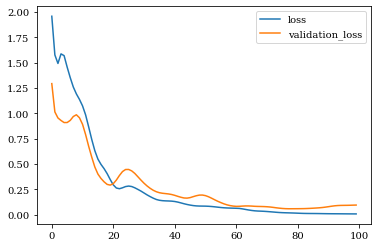

In [31]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False

_ = plt.plot(history.history['loss'])
_ = plt.plot(history.history['val_loss'])
_ = plt.legend(('loss', 'validation_loss'))
_ = plt.show()

In [40]:
orbit_ = read_h5('OrbitKS_L37p297_T79p783.h5', directory='../data/test_data/')

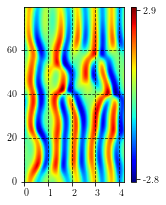

In [42]:
orbit_.plot()

In [44]:
orbit_ = rediscretize(orbit_, new_shape=(32,32))

In [47]:
cnn.predict(orbit_.convert(to='field').state.reshape(1, 32, 32, 1))

array([[1.1801391, 2.8975086, 0.2867364]], dtype=float32)

In [ ]:
sa = np.array([[2, 0, 0], [0, 1, 1], [0, 1, 1]])

In [48]:
tiling = rediscretize(tile(sa, td, OrbitKS),new_shape=(32, 32))

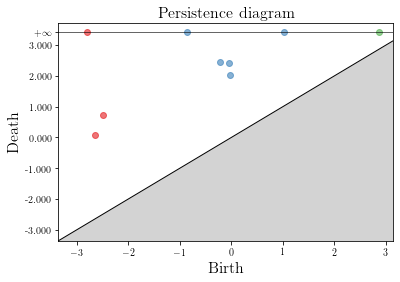

In [51]:
pcc = orbit_periodic_cubical_complex(orbit_) 
gudhi_plot(pcc.persistence(min_persistence=2))

In [ ]:
X, y = list_of_orbits, list_of_predictive_quantities
orbit_cnn(X, y)